# Discrete Fourier transform and Hermitian symmetry

In [35]:
import matplotlib
# matplotlib.use('Qt4Agg') # if problem with PyQt5

import numpy as np
import soundfile as sf 
import matplotlib.pyplot as plt
%matplotlib inline

import IPython.display as ipd

We load a piano signal, plot its waveform, and listen to it.

sampling rate: 16000


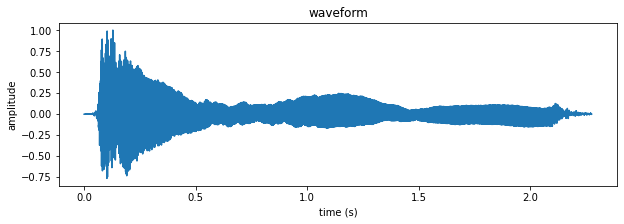

In [36]:
wavfile = './data/piano_note_isol.wav'

x, fs = sf.read(wavfile)

print("sampling rate: %d" % fs)

T = x.shape[0]

time_axis = np.arange(0, T)/fs # time axis in seconds

plt.figure(figsize=(10,3))
plt.plot(time_axis, x)
plt.xlabel('time (s)')
plt.ylabel('amplitude')
plt.title('waveform')

ipd.Audio(x, rate=fs) 

We compute its discrete Fourier transform (DFT) with a number of points $F$ equal to the signal length $T$: 

$$ X(f) = \sum_{t=0}^{T-1} x(t) \exp\left(-j2\pi \frac{f t}{F}\right), \qquad \forall f \in \{0,...,F-1\}. $$


We plot the magnitude spectrum and the power spectrum in dB.

(-10.0, 80.0)

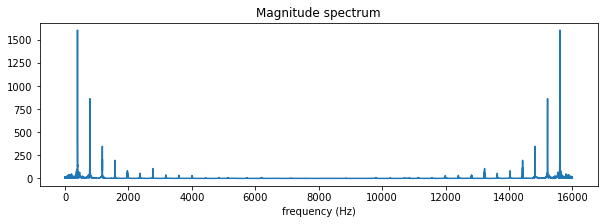

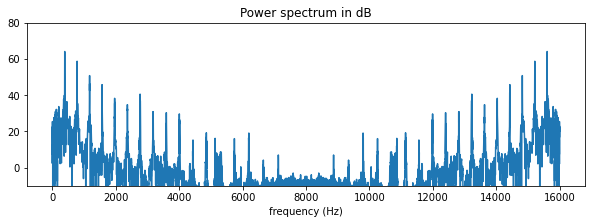

In [37]:
F = T # number of points for the DFT

X = np.fft.fft(x, F) # DFT

freq_axis = np.arange(F)/F*fs # frequency axis in Hertz

plt.figure(figsize=(10,3))
plt.plot(freq_axis, np.abs(X))
plt.title('Magnitude spectrum')
plt.xlabel('frequency (Hz)')

plt.figure(figsize=(10,3))
plt.plot(freq_axis, 10*np.log10(np.abs(X)**2))
plt.title('Power spectrum in dB')
plt.xlabel('frequency (Hz)')
plt.ylim([-10, 80])

The DFT is generally complex-valued. However, due to the Hermitian symmetry property that holds for real-valued signals, we have: 

$$X(F-f) = X^*(f), \qquad f \in \{0,...,F-1\}.$$

**Question**: Print the values of `X(0)` and `X(F//2)`, what is special with these two coefficients, compared with other ones? Assuming $F$ is even, justify theoretically what you observe.

In [38]:
# zero-frequency coefficient
X_0 = X[0]
print("DFT coef. at frequency 0: ", end='')
print(X_0)

# Nyquist-frequency coefficient
X_nyq = X[F//2]
print("DFT coef. at Nyquist frequency: ", end='')
print(X_nyq)

DFT coef. at frequency 0: (-4.173736572265625+0j)
DFT coef. at Nyquist frequency: (-0.06069946289062661+5.551115123125783e-16j)


**Answer**: Assuming $F$ is even, the DFT coefficient at **Nyquist frequency** is therefore real-valued: 

$$X(F-F/2) = X(F/2) = X^*(F/2) \in \mathbb{R}.$$

Moreover, from the definition of the DFT, the coefficient at the **zero frequency** correponds to the sum of the signal coefficients, and it is therefore also real-valued: 

$$X(0) = \sum_{t=0}^{T-1} x(t) \in \mathbb{R}.$$

The DFT can consequently be splitted into 4 parts:

1. The zero-frequency coefficient $X(0)$, which is real valued,
2. The (F/2-1) positive-frequency coefficients $X(f)$, $f = 1,...,F/2-1$,
3. The Nyquist-frequency coefficient $X(F/2)$, which is real valued,
4. The (F/2-1) negative-frequency coefficients $X(f)$, $f = F/2+1,...,F-1$.

The Hermitian symmetry property tells us that the negative-frequency coefficients are equal to the conjugate of the positive-frequency coefficients when we reverse the frequency axis. Let's verify this.

In [41]:
# zero-frequency coefficient
X_0 = X[0]
print("DFT coef. at frequency 0: ", end='')
print(X_0)

# positive-frequency coefficient
X_p = X[1:F//2] # shape F/2-1

# Nyquist-frequency coefficient
X_nyq = X[F//2]
print("DFT coef. at Nyquist frequency: ", end='')
print(X_nyq)

# negative-frequency coefficient
X_n = X[F//2+1:] # shape F/2-1

# using the Hermitian symetry property, we can predict the negative part from the positive one
X_n_from_p = np.conj(np.flipud(X_p))

# we can verify that Hermitian symetry holds
print("Error: ", end='')
print(np.sum(X_n - X_n_from_p))

DFT coef. at frequency 0: (-4.173736572265625+0j)
DFT coef. at Nyquist frequency: (-0.06069946289062661+5.551115123125783e-16j)
Error: (2.7107135980308783e-13-6.251249518030022e-13j)
